# **DL LAB Practice Programming Assignment-4**

# Problem: Multiclass image classification

In [2]:
#importing Libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import numpy as np

In [3]:
#Loading dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.cifar10.load_data()
len(X_train)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


50000

In [4]:
len(X_train)

50000

In [5]:
#Example Shape of a single image
X_train[0].shape

(32, 32, 3)

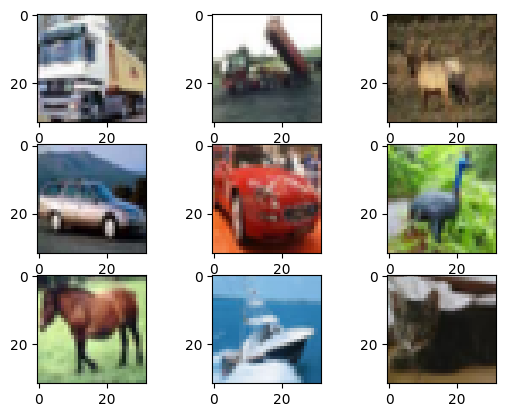

In [6]:
#Plotting some pictures to view
for i in range(1, 10):
	plt.subplot(3, 3, i)
	plt.imshow(X_train[i])

plt.show()

In [7]:
# Normalize the images (pixel values between 0 and 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
model = Sequential([
    # Convolutional Layers
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPool2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPool2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPool2D((2,2)),

    # Flatten to feed into the Fully Connected Layer
    Flatten(),

    # Fully Connected Layers (MLP)
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 99ms/step - accuracy: 0.2716 - loss: 1.9515 - val_accuracy: 0.5219 - val_loss: 1.3222
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.4936 - loss: 1.3869 - val_accuracy: 0.6068 - val_loss: 1.1213
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.5800 - loss: 1.1744 - val_accuracy: 0.6264 - val_loss: 1.0561
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.6274 - loss: 1.0486 - val_accuracy: 0.6775 - val_loss: 0.9230
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.6652 - loss: 0.9498 - val_accuracy: 0.7060 - val_loss: 0.8665
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.6965 - loss: 0.8747 - val_accuracy: 0.7106 - val_loss: 0.8438
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - accuracy: 0.7192 - loss: 0.8100 - val_accuracy: 0.7246 - val_loss: 0.8154
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7325 - loss: 0.7700 - 

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 4s - 13ms/step - accuracy: 0.7423 - loss: 0.7980
Test accuracy: 0.7423


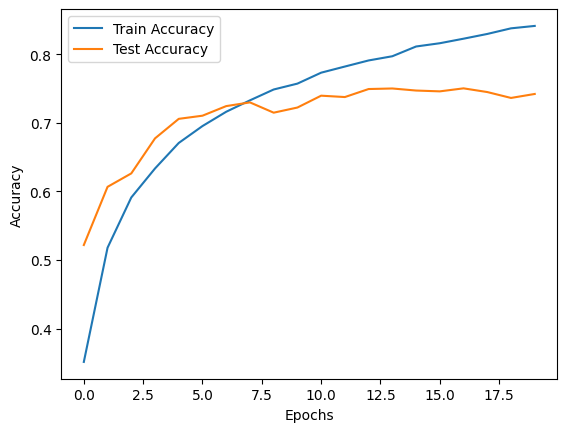

In [12]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.models import Model

# Create a new model that outputs the features from the last convolutional layer
feature_extractor = Model(inputs=model.inputs, outputs=model.layers[-3].output)

# Extract features for the training and test sets
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Flatten the features
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

   9/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 32, 32, 3))
  warnings.warn(msg)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Convert one-hot encoded labels back to class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_features, y_train_labels)

# Evaluate the SVM classifier
y_pred = svm_classifier.predict(X_test_features)
svm_accuracy = accuracy_score(y_test_labels, y_pred)
print(f'SVM Test Accuracy: {svm_accuracy:.4f}')

SVM Test Accuracy: 0.7491


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Select a subset of test images for evaluation
num_samples = 1000  # Adjust as needed
indices = np.random.choice(len(X_test), num_samples, replace=False)
X_test_subset = X_test[indices]
X_test_features_subset = X_test_features[indices]
y_test_subset = y_test[indices]
y_test_labels_subset = np.argmax(y_test_subset, axis=1)

# Get the predicted labels for the CNN model
y_pred_cnn = model.predict(X_test_subset)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)

# Get the predicted labels for the SVM model
y_pred_svm = svm_classifier.predict(X_test_features_subset)

# Compute accuracies
cnn_accuracy = accuracy_score(y_test_labels_subset, y_pred_cnn_labels)
svm_accuracy = accuracy_score(y_test_labels_subset, y_pred_svm)

# Print accuracies
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')
print(f'SVM Test Accuracy: {svm_accuracy:.4f}')

# Plot accuracy comparison
models = ['CNN', 'SVM']
accuracies = [cnn_accuracy, svm_accuracy]

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
CNN Test Accuracy: 0.7440
SVM Test Accuracy: 0.7550
